In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

from imblearn.over_sampling import SMOTE
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Project/Laptops_Data.csv')
df.head().T

,0,1,2,3,4
UserID,1005882,1005884,1005886,1005889,1005907
Taken_product,No,No,No,No,Yes
Yearly_avg_view_on_travel_page,379.0,255.0,250.0,295.0,250.0
preferred_device,Laptop,Laptop,Laptop,Laptop,Laptop
total_likes_on_outstation_checkin_given,9776.0,48725.0,35184.0,7572.0,39379.0
yearly_avg_Outstation_checkins,8,3,2,23,16
member_in_family,1,4,2,3,1
preferred_location_type,Beach,Beach,Beach,Beach,Beach
Yearly_avg_comment_on_travel_page,64.0,59.0,84.0,48.0,80.0
total_likes_on_outofstation_checkin_received,5142,2913,3074,9532,3926


In [ ]:
df.shape

(1108, 17)

In [ ]:
df.drop(columns=['UserID'], inplace=True)

In [ ]:
df.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [ ]:
df1 =df.copy()
df1

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,No,379.0,Laptop,9776.0,8,1,Beach,64.0,5142,1,No,33,Yes,4,1,10
1,No,255.0,Laptop,48725.0,3,4,Beach,59.0,2913,1,Yes,19,No,3,0,8
2,No,250.0,Laptop,35184.0,2,2,Beach,84.0,3074,0,No,23,No,3,0,8
3,No,295.0,Laptop,7572.0,23,3,Beach,48.0,9532,0,No,33,Yes,2,0,10
4,Yes,250.0,Laptop,39379.0,16,1,Beach,80.0,3926,1,Yes,33,Yes,2,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,No,278.0,Laptop,24127.0,4,2,Beach,115.0,5184,7,No,35,No,2,3,23
1104,Yes,388.0,Laptop,30775.0,1,4,Beach,109.0,6787,8,No,29,No,4,2,14
1105,No,268.0,Laptop,42010.0,18,4,Beach,98.0,5753,2,Yes,34,No,4,2,17
1106,No,279.0,Laptop,30987.0,23,2,Historical site,58.0,2616,4,No,36,No,3,1,23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 1108 non-null   object 
 1   Yearly_avg_view_on_travel_page                1108 non-null   float64
 2   preferred_device                              1108 non-null   object 
 3   total_likes_on_outstation_checkin_given       1108 non-null   float64
 4   yearly_avg_Outstation_checkins                1108 non-null   int64  
 5   member_in_family                              1108 non-null   int64  
 6   preferred_location_type                       1108 non-null   object 
 7   Yearly_avg_comment_on_travel_page             1108 non-null   float64
 8   total_likes_on_outofstation_checkin_received  1108 non-null   int64  
 9   week_since_last_outstation_checkin            1108 non-null   i

In [ ]:
df1['preferred_location_type'].value_counts()

preferred_location_type
Beach              492
Historical site    344
Big Cities         108
Trekking            84
Other               56
Hill Stations       24
Name: count, dtype: int64

In [ ]:
print(pd.Categorical(df1['preferred_location_type'].unique()))
print(pd.Categorical(df1['preferred_location_type'].unique()).codes)
df1['preferred_location_type'] = pd.Categorical(df1['preferred_location_type']).codes

['Beach', 'Historical site', 'Big Cities', 'Trekking', 'Other', 'Hill Stations']
Categories (6, object): ['Beach', 'Big Cities', 'Hill Stations', 'Historical site', 'Other',
                         'Trekking']
[0 3 1 5 4 2]


In [ ]:
df1['preferred_location_type'].value_counts()

preferred_location_type
0    492
3    344
1    108
5     84
4     56
2     24
Name: count, dtype: int64

In [ ]:
df1['working_flag'] = df1['working_flag'].replace('Yes', 0)
df1['working_flag'] = df1['working_flag'].replace('No', 1)

In [ ]:
df1['following_company_page'] = df1['following_company_page'].replace('Yes', 0)
df1['following_company_page'] = df1['following_company_page'].replace('No', 1)

In [ ]:
# print(pd.Categorical(df1['Yearly_avg_comment_on_travel_page'].unique()))
# print(pd.Categorical(df1['Yearly_avg_comment_on_travel_page'].unique()).codes)

In [ ]:
df1['Taken_product'] = df1['Taken_product'].replace('Yes', 0)
df1['Taken_product'] = df1['Taken_product'].replace('No', 1)

In [ ]:
df1['total_likes_on_outstation_checkin_given'].astype(int)

0        9776
1       48725
2       35184
3        7572
4       39379
        ...  
1103    24127
1104    30775
1105    42010
1106    30987
1107    35851
Name: total_likes_on_outstation_checkin_given, Length: 1108, dtype: int64

In [ ]:
df1['Yearly_avg_comment_on_travel_page'].astype(int)


0        64
1        59
2        84
3        48
4        80
       ... 
1103    115
1104    109
1105     98
1106     58
1107     83
Name: Yearly_avg_comment_on_travel_page, Length: 1108, dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 1108 non-null   int64  
 1   Yearly_avg_view_on_travel_page                1108 non-null   float64
 2   preferred_device                              1108 non-null   object 
 3   total_likes_on_outstation_checkin_given       1108 non-null   float64
 4   yearly_avg_Outstation_checkins                1108 non-null   int64  
 5   member_in_family                              1108 non-null   int64  
 6   preferred_location_type                       1108 non-null   int8   
 7   Yearly_avg_comment_on_travel_page             1108 non-null   float64
 8   total_likes_on_outofstation_checkin_received  1108 non-null   int64  
 9   week_since_last_outstation_checkin            1108 non-null   i

In [ ]:
df_laptop = df1
df_laptop

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1,379.0,Laptop,9776.0,8,1,0,64.0,5142,1,1,33,0,4,1,10
1,1,255.0,Laptop,48725.0,3,4,0,59.0,2913,1,0,19,1,3,0,8
2,1,250.0,Laptop,35184.0,2,2,0,84.0,3074,0,1,23,1,3,0,8
3,1,295.0,Laptop,7572.0,23,3,0,48.0,9532,0,1,33,0,2,0,10
4,0,250.0,Laptop,39379.0,16,1,0,80.0,3926,1,0,33,0,2,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1,278.0,Laptop,24127.0,4,2,0,115.0,5184,7,1,35,1,2,3,23
1104,0,388.0,Laptop,30775.0,1,4,0,109.0,6787,8,1,29,1,4,2,14
1105,1,268.0,Laptop,42010.0,18,4,0,98.0,5753,2,0,34,1,4,2,17
1106,1,279.0,Laptop,30987.0,23,2,3,58.0,2616,4,1,36,1,3,1,23


In [ ]:
df_laptop['preferred_device']=df_laptop['preferred_device'].replace({'Laptop':1})
#df_laptop
df_laptop['preferred_device'].value_counts()

preferred_device
1    1108
Name: count, dtype: int64

In [ ]:
from scipy.stats import zscore

In [ ]:
X = df_laptop.drop(columns=['Taken_product'], axis=1)
Y = df_laptop['Taken_product']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

In [ ]:
X.head()

,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,379.0,1,9776.0,8,1,0,64.0,5142,1,1,33,0,4,1,10
1,255.0,1,48725.0,3,4,0,59.0,2913,1,0,19,1,3,0,8
2,250.0,1,35184.0,2,2,0,84.0,3074,0,1,23,1,3,0,8
3,295.0,1,7572.0,23,3,0,48.0,9532,0,1,33,0,2,0,10
4,250.0,1,39379.0,16,1,0,80.0,3926,1,0,33,0,2,0,10


In [ ]:
Y.head()

0    1
1    1
2    1
3    1
4    0
Name: Taken_product, dtype: int64

In [ ]:
X_train.shape

(775, 15)

In [ ]:
Y_train.shape

(775,)

In [ ]:
X_test.shape

(333, 15)

In [ ]:
Y_test.shape

(333,)

## **CART Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier(criterion = 'gini')
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model,
                                out_file=ld_Tree_File,
                                feature_names = list(X_train),
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [ ]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                                   Imp
Yearly_avg_view_on_travel_page                0.193081
total_likes_on_outstation_checkin_given       0.155804
total_likes_on_outofstation_checkin_received  0.139382
yearly_avg_Outstation_checkins                0.073610
Yearly_avg_comment_on_travel_page             0.070804
week_since_last_outstation_checkin            0.063407
following_company_page                        0.059435
travelling_network_rating                     0.059225
working_flag                                  0.055079
Daily_Avg_mins_spend_on_traveling_page        0.054686
Adult_flag                                    0.023320
preferred_location_type                       0.021565
member_in_family                              0.016333
montly_avg_comment_on_company_page            0.014270
preferred_device                              0.000000


In [ ]:
Y_predict = dt_model.predict(X_test)

In [ ]:
Y_predict.shape

(333,)

In [ ]:
Ytrain_predict = dt_model.predict(X_train)
Ytest_predict = dt_model.predict(X_test)
print('ytrain_predict',Ytrain_predict.shape)
print('ytest_predict',Ytest_predict.shape)

ytrain_predict (775,)
ytest_predict (333,)


In [ ]:
Ytest_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
Ytest_predict_prob=dt_model.predict_proba(X_test)
Ytest_predict_prob

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [ ]:
 pd.DataFrame(Ytest_predict_prob).head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


AUC: 1.000


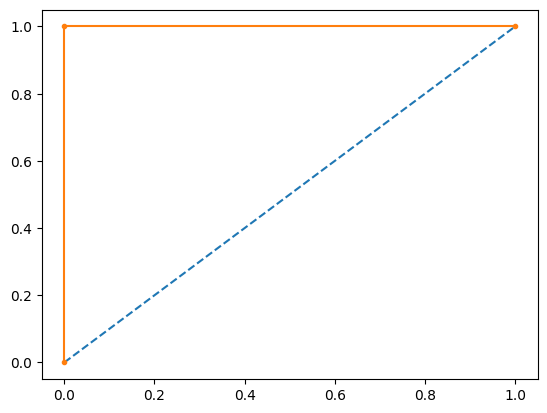

In [ ]:
# predict probabilities
probs = dt_model.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.920


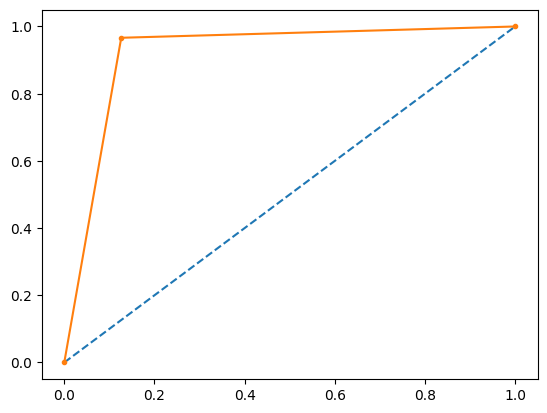

In [ ]:
# predict probabilities
probs = dt_model.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(Y_train, Ytrain_predict)

array([[181,   0],
       [  0, 594]])

In [ ]:
#Train Data Accuracy
dt_model.score(X_train,Y_train)

1.0

In [ ]:
print(classification_report(Y_train, Ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       1.00      1.00      1.00       594

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



In [ ]:
confusion_matrix(Y_test, Ytest_predict)

array([[ 83,  12],
       [  8, 230]])

In [ ]:
#Test Data Accuracy
dt_model.score(X_test,Y_test)

0.93993993993994

In [ ]:
print(classification_report(Y_test, Ytest_predict))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        95
           1       0.95      0.97      0.96       238

    accuracy                           0.94       333
   macro avg       0.93      0.92      0.93       333
weighted avg       0.94      0.94      0.94       333



## **Model Tuning**

In [ ]:
reg_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 9,min_samples_leaf=10,min_samples_split=80)
reg_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=80)

In [ ]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

In [ ]:
print (pd.DataFrame(reg_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                                   Imp
Yearly_avg_view_on_travel_page                0.392451
total_likes_on_outofstation_checkin_received  0.292289
following_company_page                        0.157448
yearly_avg_Outstation_checkins                0.095914
member_in_family                              0.027941
total_likes_on_outstation_checkin_given       0.025798
Yearly_avg_comment_on_travel_page             0.008159
preferred_device                              0.000000
preferred_location_type                       0.000000
week_since_last_outstation_checkin            0.000000
montly_avg_comment_on_company_page            0.000000
working_flag                                  0.000000
travelling_network_rating                     0.000000
Adult_flag                                    0.000000
Daily_Avg_mins_spend_on_traveling_page        0.000000


In [ ]:
Ytrain_predict = reg_model.predict(X_train)
Ytest_predict = reg_model.predict(X_test)
print('Ytrain_predict',Ytrain_predict.shape)
print('Ytest_predict',Ytest_predict.shape)

Ytrain_predict (775,)
Ytest_predict (333,)


In [ ]:
Ytest_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [ ]:
Ytest_predict_prob=reg_model.predict_proba(X_test)
Ytest_predict_prob

array([[0.15789474, 0.84210526],
       [0.05633803, 0.94366197],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.2962963 , 0.7037037 ],
       [0.05633803, 0.94366197],
       [0.        , 1.        ],
       [0.05633803, 0.94366197],
       [0.63768116, 0.36231884],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.2962963 , 0.7037037 ],
       [0.23636364, 0.76363636],
       [0.47692308, 0.52307692],
       [0.47692308, 0.52307692],
       [0.05633803, 0.94366197],
       [0.        , 1.        ],
       [0.4       , 0.6       ],
       [0.23636364, 0.76363636],
       [0.63768116, 0.36231884],
       [0.        , 1.        ],
       [0.6       , 0.4       ],
       [0.47692308, 0.52307692],
       [0.05633803, 0.94366197],
       [0.        , 1.        ],
       [0.63768116, 0.36231884],
       [0.23636364, 0.76363636],
       [0.2962963 , 0.7037037 ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.

In [ ]:
 pd.DataFrame(Ytest_predict_prob).head()

,0,1
0,0.157895,0.842105
1,0.056338,0.943662
2,0.000000,1.000000
3,0.000000,1.000000
4,0.296296,0.703704


AUC: 0.886


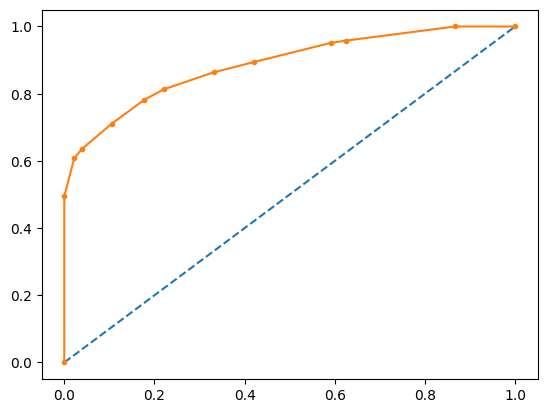

In [ ]:
# predict probabilities
probs = reg_model.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.881


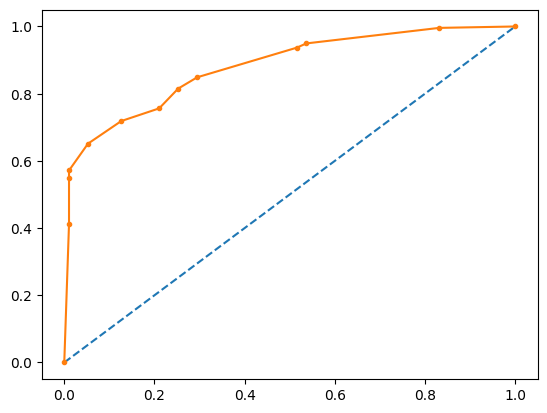

In [ ]:
# predict probabilities
probs = reg_model.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(Y_train, Ytrain_predict)

array([[ 74, 107],
       [ 29, 565]])

In [ ]:
#Train Data Accuracy
reg_model.score(X_train,Y_train)

0.824516129032258

In [ ]:
print(classification_report(Y_train, Ytrain_predict))

              precision    recall  f1-score   support

           0       0.72      0.41      0.52       181
           1       0.84      0.95      0.89       594

    accuracy                           0.82       775
   macro avg       0.78      0.68      0.71       775
weighted avg       0.81      0.82      0.81       775



**SMOTE Model**

In [ ]:
sm = SMOTE()


X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train.ravel())
## shape after SMOTE
X_train_res.shape

(1188, 15)

In [ ]:
smote_cart_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 9,min_samples_leaf=10,min_samples_split=80)
smote_cart_model.fit(X_train_res, Y_train_res)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=80)

In [ ]:
Ytrain_predict = reg_model.predict(X_train)
Ytest_predict = reg_model.predict(X_test)
print('Ytrain_predict',Ytrain_predict.shape)
print('Ytest_predict',Ytest_predict.shape)

Ytrain_predict (775,)
Ytest_predict (333,)


In [ ]:
Ytest_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [ ]:
Ytest_predict_prob=reg_model.predict_proba(X_test)
Ytest_predict_prob

array([[0.15789474, 0.84210526],
       [0.05633803, 0.94366197],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.2962963 , 0.7037037 ],
       [0.05633803, 0.94366197],
       [0.        , 1.        ],
       [0.05633803, 0.94366197],
       [0.63768116, 0.36231884],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.2962963 , 0.7037037 ],
       [0.23636364, 0.76363636],
       [0.47692308, 0.52307692],
       [0.47692308, 0.52307692],
       [0.05633803, 0.94366197],
       [0.        , 1.        ],
       [0.4       , 0.6       ],
       [0.23636364, 0.76363636],
       [0.63768116, 0.36231884],
       [0.        , 1.        ],
       [0.6       , 0.4       ],
       [0.47692308, 0.52307692],
       [0.05633803, 0.94366197],
       [0.        , 1.        ],
       [0.63768116, 0.36231884],
       [0.23636364, 0.76363636],
       [0.2962963 , 0.7037037 ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.

In [ ]:
 pd.DataFrame(Ytest_predict_prob).head()

,0,1
0,0.157895,0.842105
1,0.056338,0.943662
2,0.000000,1.000000
3,0.000000,1.000000
4,0.296296,0.703704


AUC: 0.886


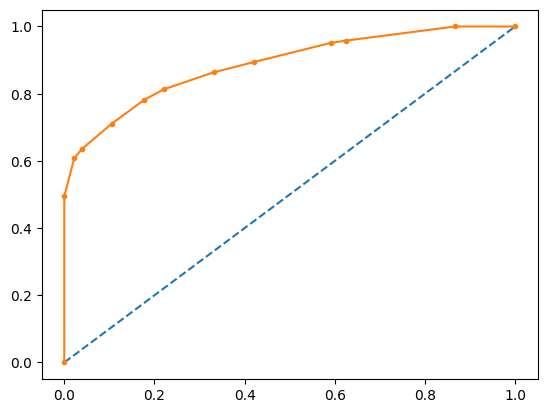

In [ ]:
# predict probabilities
probs = reg_model.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')

plt.show()

AUC: 0.881


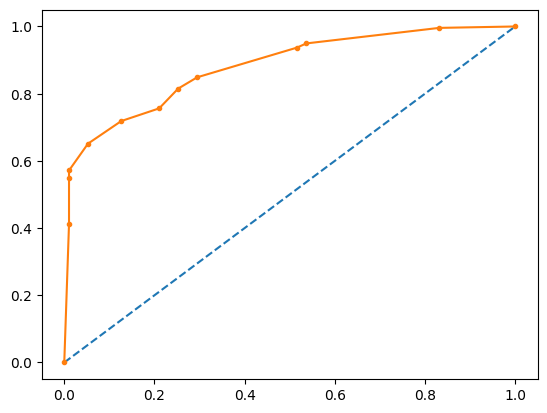

In [ ]:
# predict probabilities
probs = reg_model.predict_proba(X_test)
probs = probs[:, 1]
# AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(Y_train, Ytrain_predict)

array([[ 74, 107],
       [ 29, 565]])

In [ ]:
#Train Data Accuracy
reg_model.score(X_train,Y_train)

0.824516129032258

In [ ]:
print(classification_report(Y_train, Ytrain_predict))

              precision    recall  f1-score   support

           0       0.72      0.41      0.52       181
           1       0.84      0.95      0.89       594

    accuracy                           0.82       775
   macro avg       0.78      0.68      0.71       775
weighted avg       0.81      0.82      0.81       775



In [ ]:
confusion_matrix(Y_test, Ytest_predict)

array([[ 46,  49],
       [ 15, 223]])

In [ ]:
#Test Data Accuracy
reg_model.score(X_test,Y_test)

0.8078078078078078

In [ ]:
print(classification_report(Y_test, Ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.48      0.59        95
           1       0.82      0.94      0.87       238

    accuracy                           0.81       333
   macro avg       0.79      0.71      0.73       333
weighted avg       0.80      0.81      0.79       333



**Using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
log_train_predict = log_model.predict(X_train)
log_test_predict = log_model.predict(X_test)
log_model.score(X_train,Y_train)

0.7935483870967742

In [ ]:
log_model.score(X_test,Y_test)

0.7627627627627628

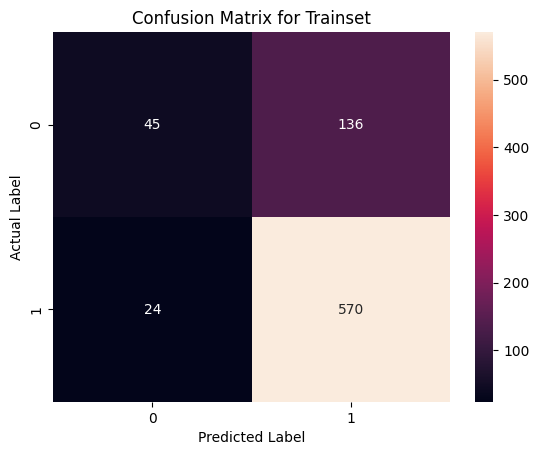

In [ ]:
#Confusion Matrix for Training set
confusion_matrix(Y_train,log_train_predict)
sns.heatmap(confusion_matrix(Y_train,log_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [ ]:
print(classification_report(Y_train,log_train_predict))

              precision    recall  f1-score   support

           0       0.65      0.25      0.36       181
           1       0.81      0.96      0.88       594

    accuracy                           0.79       775
   macro avg       0.73      0.60      0.62       775
weighted avg       0.77      0.79      0.76       775



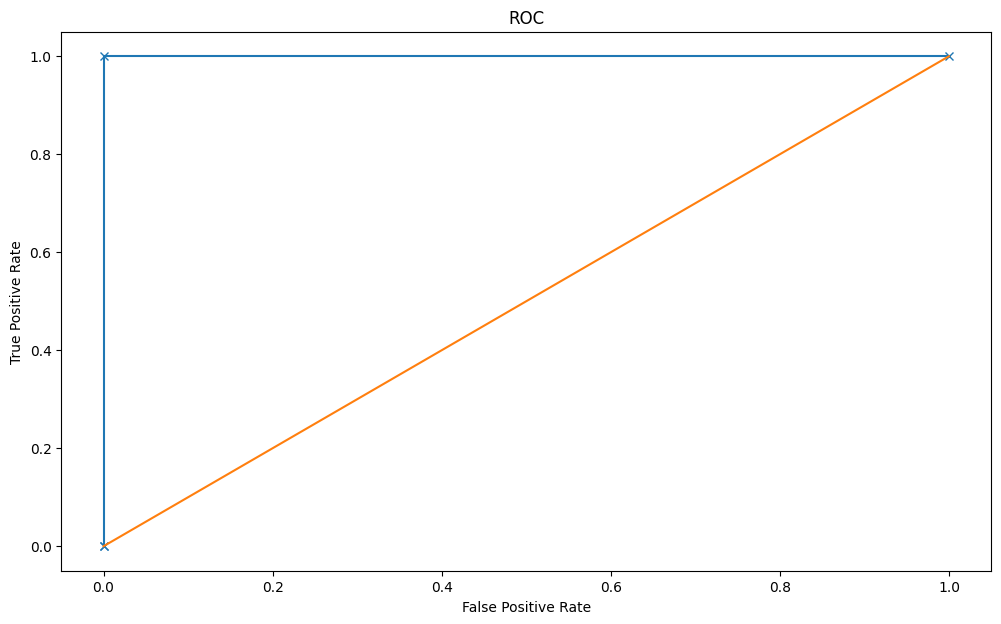

Area under Curve is 1.0


In [ ]:
import numpy as np
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_train_predict,log_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(log_train_predict,log_model.predict_proba(X_train)[:,1]))

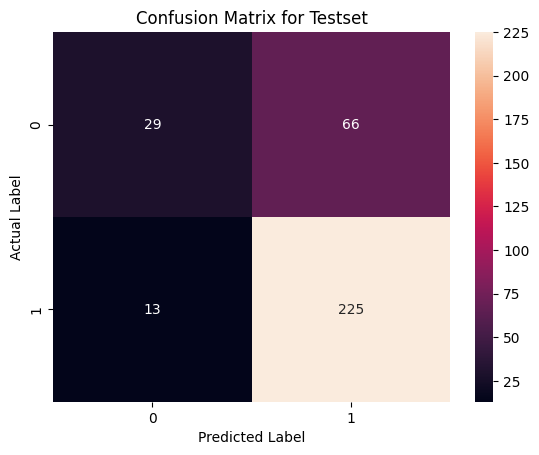

In [ ]:
#Confusion Matrix for Train set
confusion_matrix(Y_test,log_test_predict)
sns.heatmap(confusion_matrix(Y_test,log_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [ ]:
print(classification_report(Y_test,log_test_predict))

              precision    recall  f1-score   support

           0       0.69      0.31      0.42        95
           1       0.77      0.95      0.85       238

    accuracy                           0.76       333
   macro avg       0.73      0.63      0.64       333
weighted avg       0.75      0.76      0.73       333



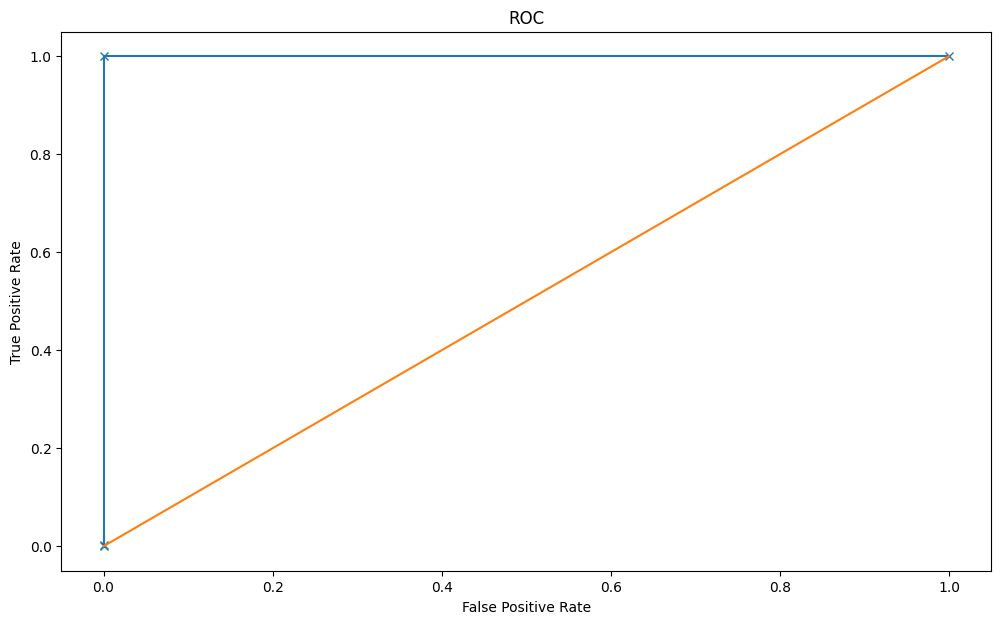

Area under Curve is 1.0


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_test_predict,log_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(log_test_predict,log_model.predict_proba(X_test)[:,1]))

In [ ]:
grid_log={'penalty':['none', 'l1', 'l2', 'elasticnet'],
      'solver':['sag','lbfgs','newtoncg','lbfgs', 'liblinear', 'saga'],
      'tol':[0.0001,0.00001]}

In [ ]:
grid_search1 = GridSearchCV(estimator = log_model, param_grid = grid_log, cv = 3,n_jobs=-1,scoring='f1')
grid_search1.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['sag', 'lbfgs', 'newtoncg', 'lbfgs',
                                    'liblinear', 'saga'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [ ]:
print(grid_search1.best_params_,'\n')
print(grid_search1.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(penalty='l1', solver='liblinear')


In [ ]:
best_model1 = grid_search1.best_estimator_

In [ ]:
# Prediction on the training set

log_train_predict = best_model1.predict(X_train)
log_test_predict = best_model1.predict(X_test)

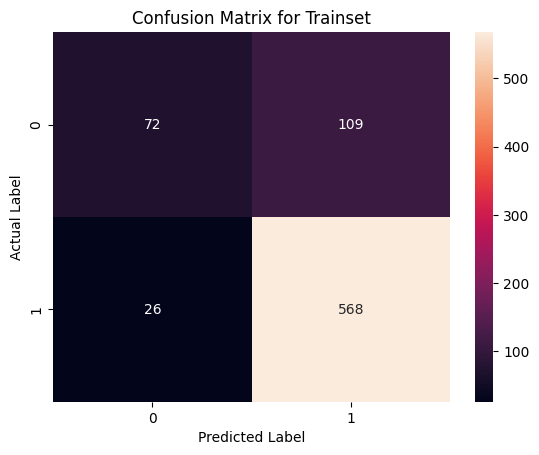

In [ ]:
#Confusion Matrix for Train set
confusion_matrix(Y_train,log_train_predict)
sns.heatmap(confusion_matrix(Y_train,log_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [ ]:
print(classification_report(Y_train,log_train_predict))

              precision    recall  f1-score   support

           0       0.73      0.40      0.52       181
           1       0.84      0.96      0.89       594

    accuracy                           0.83       775
   macro avg       0.79      0.68      0.70       775
weighted avg       0.81      0.83      0.81       775



Text(0.5, 1.0, 'ROC')

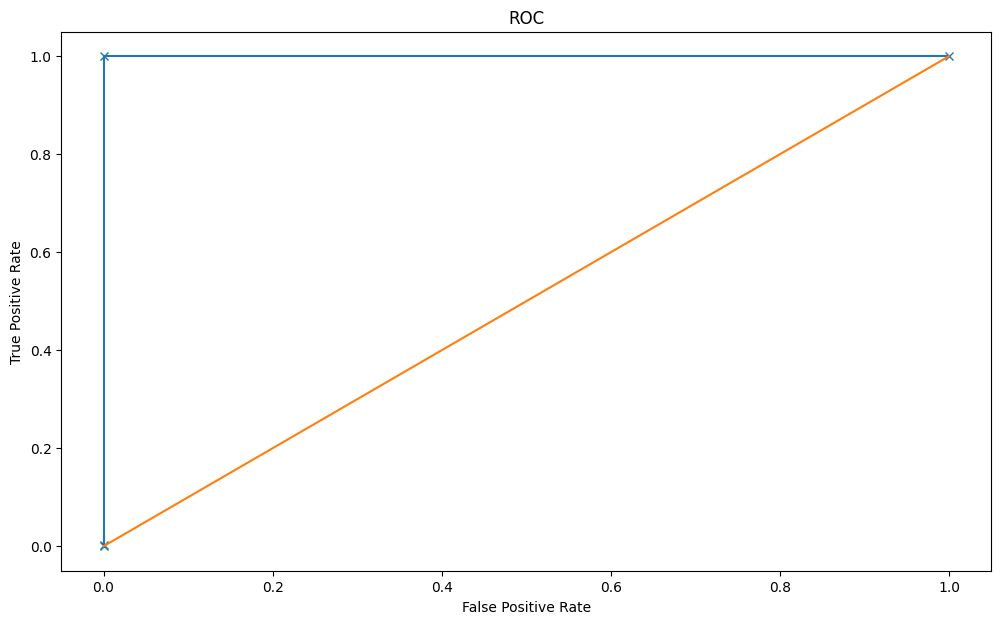

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_train_predict,best_model1.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

Feature: 0, Score: 0.00258
Feature: 1, Score: -0.27379
Feature: 2, Score: 0.00002
Feature: 3, Score: -0.05326
Feature: 4, Score: -0.01639
Feature: 5, Score: 0.10348
Feature: 6, Score: -0.01621
Feature: 7, Score: 0.00013
Feature: 8, Score: -0.19904
Feature: 9, Score: 1.46890
Feature: 10, Score: -0.03109
Feature: 11, Score: -0.24817
Feature: 12, Score: 0.28740
Feature: 13, Score: 0.35694
Feature: 14, Score: 0.08451


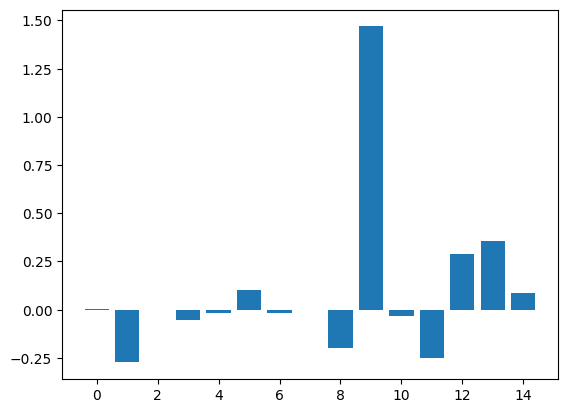

In [ ]:
# get importance
importance = best_model1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**Linear Discrimant Analysis**

In [ ]:
LDA = LinearDiscriminantAnalysis()
lda_model=LDA.fit(X_train, Y_train)
lda_model

LinearDiscriminantAnalysis()

In [ ]:
lda_train_predict = lda_model.predict(X_train)
lda_test_predict = lda_model.predict(X_test)

In [ ]:
lda_model.score(X_train,Y_train)

0.8193548387096774

In [ ]:
lda_model.score(X_test,Y_test)

0.8078078078078078

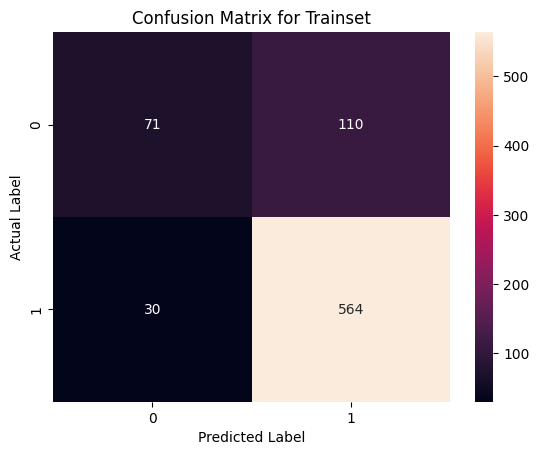

In [ ]:
#Confusion Matrix for Train set
confusion_matrix(Y_train,lda_train_predict)
sns.heatmap(confusion_matrix(Y_train,lda_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [ ]:
print(classification_report(Y_train,lda_train_predict))

              precision    recall  f1-score   support

           0       0.70      0.39      0.50       181
           1       0.84      0.95      0.89       594

    accuracy                           0.82       775
   macro avg       0.77      0.67      0.70       775
weighted avg       0.81      0.82      0.80       775



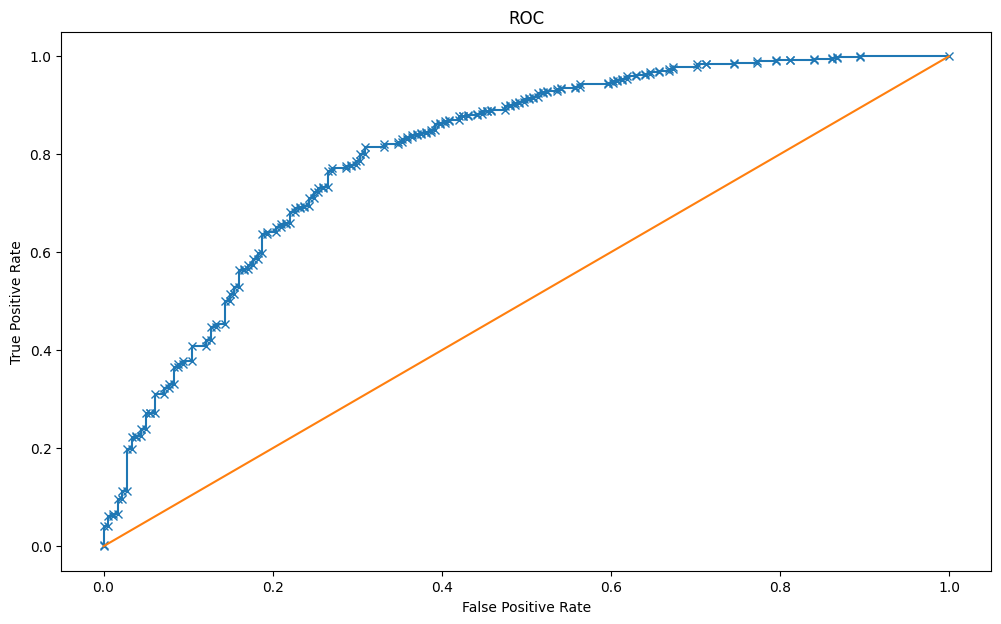

Area under Curve is 0.8056160127983333


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(Y_train,lda_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(Y_train,lda_model.predict_proba(X_train)[:,1]))

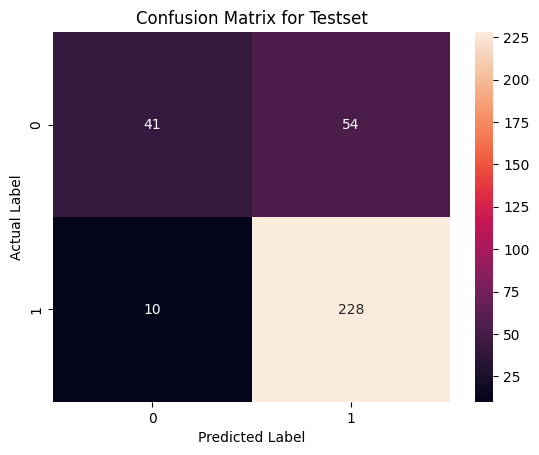

In [ ]:
#Confusion Matrix for Test set
confusion_matrix(Y_test,lda_test_predict)
sns.heatmap(confusion_matrix(Y_test,lda_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [ ]:
print(classification_report(Y_test,lda_test_predict))

              precision    recall  f1-score   support

           0       0.80      0.43      0.56        95
           1       0.81      0.96      0.88       238

    accuracy                           0.81       333
   macro avg       0.81      0.69      0.72       333
weighted avg       0.81      0.81      0.79       333



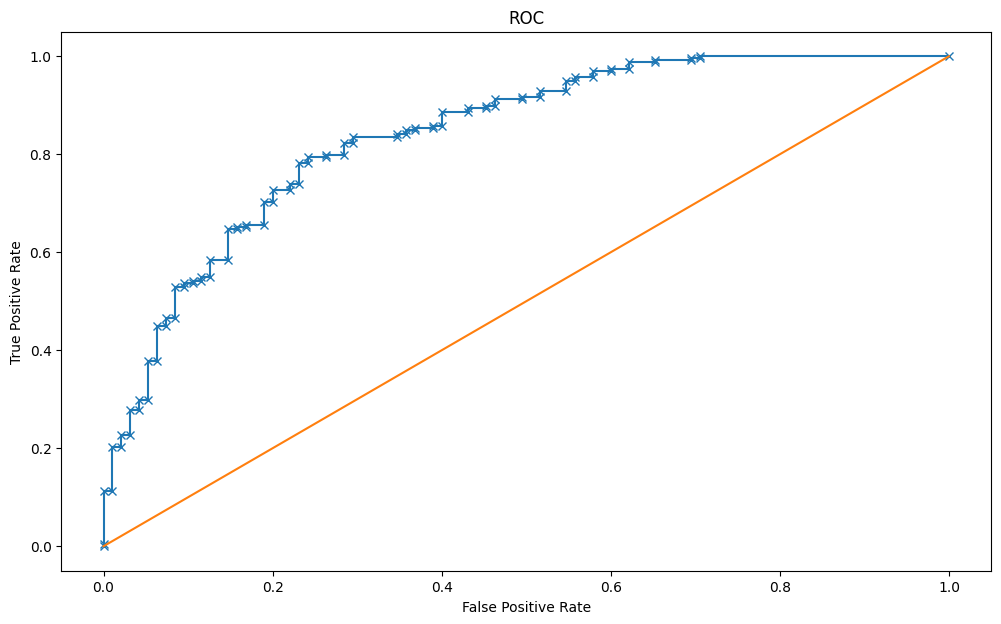

Area under Curve is 0.8405130473241927


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(Y_test,lda_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(Y_test,lda_model.predict_proba(X_test)[:,1]))

In [ ]:
grid_lda={ 'solver':['svd', 'lsqr', 'eigen'],
          'shrinkage':['auto', 'float','none'],
          'tol':[0.001,0.0001,0.00001]}
grid_search2 = GridSearchCV(estimator = lda_model, param_grid = grid_lda, cv = 3,n_jobs=-1,scoring='f1')
grid_search2.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': ['auto', 'float', 'none'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='f1')

In [ ]:
lda_model.score(X_test,Y_test)

0.8078078078078078

In [ ]:
print(grid_search2.best_params_,'\n')
print(grid_search2.best_estimator_)

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.001} 

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)


In [ ]:
best_model2 = grid_search2.best_estimator_

In [ ]:
lda_train_predict = best_model2.predict(X_train)
lda_test_predict = best_model2.predict(X_test)

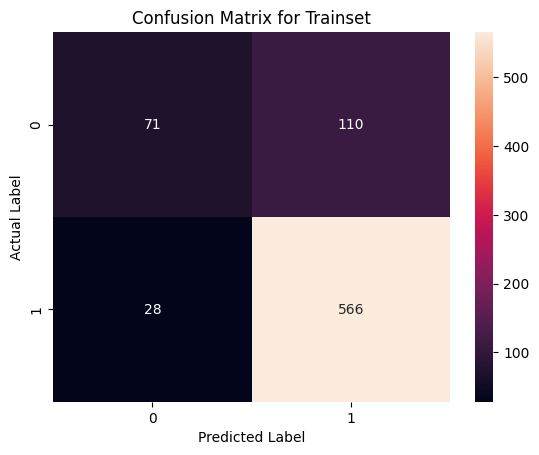

In [ ]:
#Confusion Matrix for Train set
confusion_matrix(Y_train,lda_train_predict)
sns.heatmap(confusion_matrix(Y_train,lda_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [ ]:
print(classification_report(Y_train,lda_train_predict))

              precision    recall  f1-score   support

           0       0.72      0.39      0.51       181
           1       0.84      0.95      0.89       594

    accuracy                           0.82       775
   macro avg       0.78      0.67      0.70       775
weighted avg       0.81      0.82      0.80       775



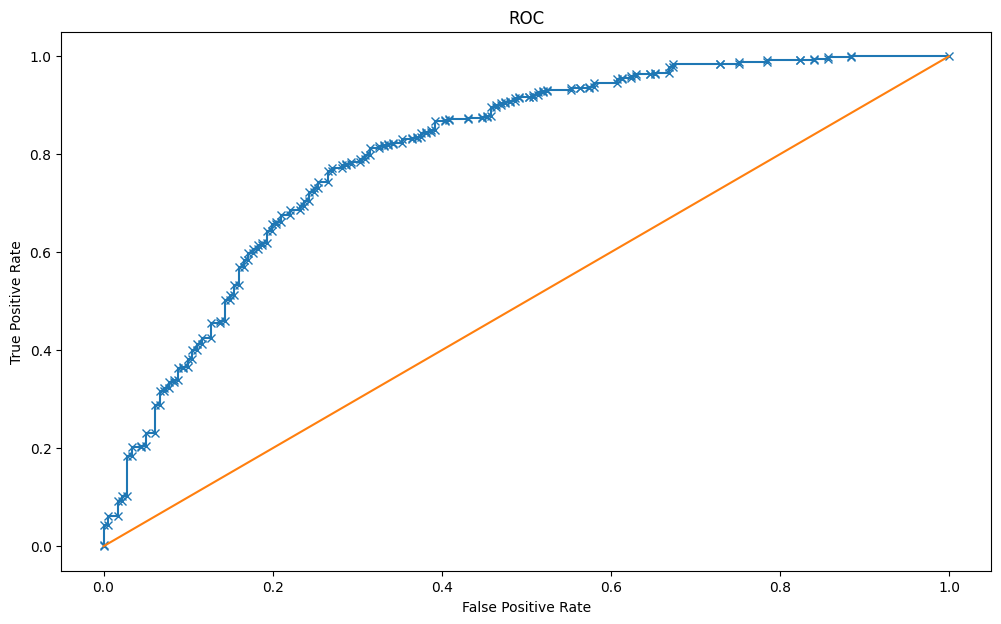

Area under Curve is 0.8054299905128635


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(Y_train,best_model2.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(Y_train,best_model2.predict_proba(X_train)[:,1]))

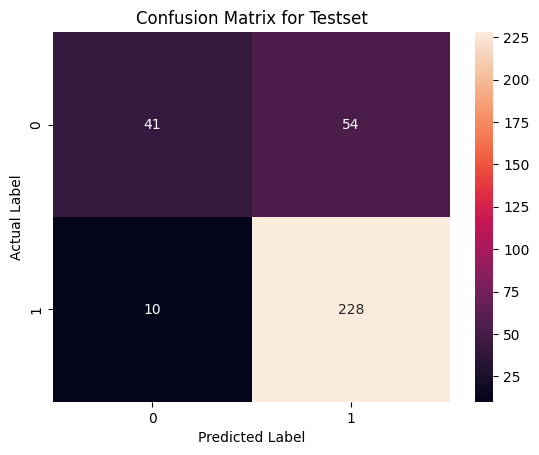

In [ ]:
#Confusion Matrix for Test set
confusion_matrix(Y_test,lda_test_predict)
sns.heatmap(confusion_matrix(Y_test,lda_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [ ]:
print(classification_report(Y_test,lda_test_predict))

              precision    recall  f1-score   support

           0       0.80      0.43      0.56        95
           1       0.81      0.96      0.88       238

    accuracy                           0.81       333
   macro avg       0.81      0.69      0.72       333
weighted avg       0.81      0.81      0.79       333



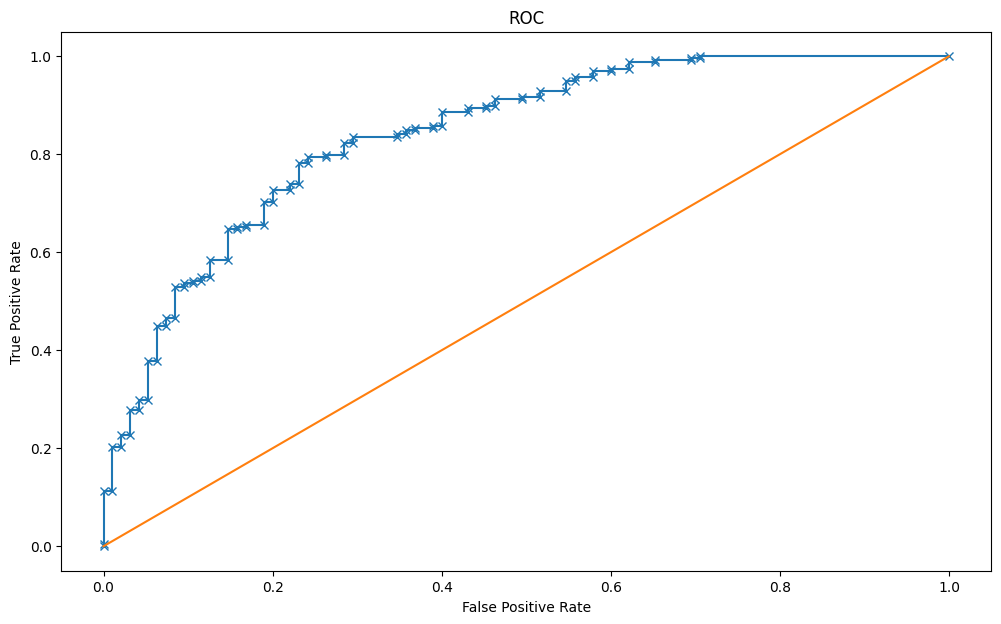

Area under Curve is 0.8405130473241927


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(Y_test,lda_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(Y_test,lda_model.predict_proba(X_test)[:,1]))

Feature: 0, Score: 0.00432
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00002
Feature: 3, Score: -0.04413
Feature: 4, Score: 0.01860
Feature: 5, Score: 0.11155
Feature: 6, Score: -0.01298
Feature: 7, Score: 0.00010
Feature: 8, Score: -0.19016
Feature: 9, Score: 1.70141
Feature: 10, Score: -0.01983
Feature: 11, Score: -0.05765
Feature: 12, Score: 0.27455
Feature: 13, Score: 0.39440
Feature: 14, Score: 0.06323


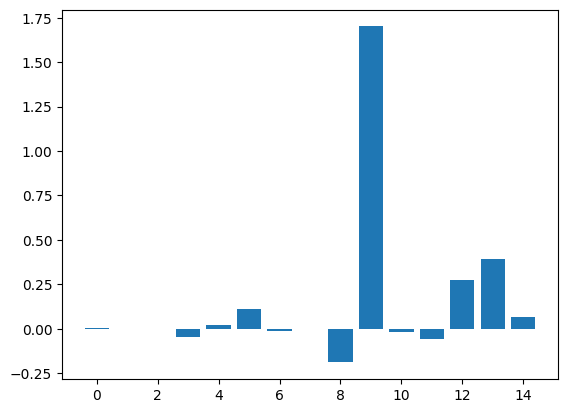

In [ ]:
# get importance
importance = best_model2.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model=RF_model.fit(X_train, Y_train)
RF_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train, Y_train)
print(model_score)

1.0


In [ ]:
RF_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, Y_test)
print(model_score)

0.978978978978979


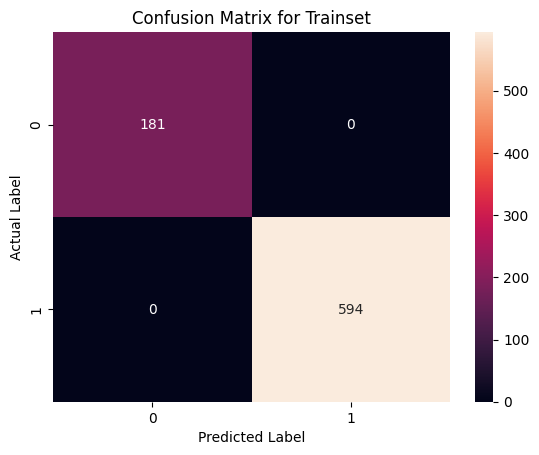

In [ ]:
#Confusion Matrix for Train set
confusion_matrix(Y_train,RF_train_predict)
sns.heatmap(confusion_matrix(Y_train,RF_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [ ]:
print(classification_report(Y_train,RF_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       1.00      1.00      1.00       594

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



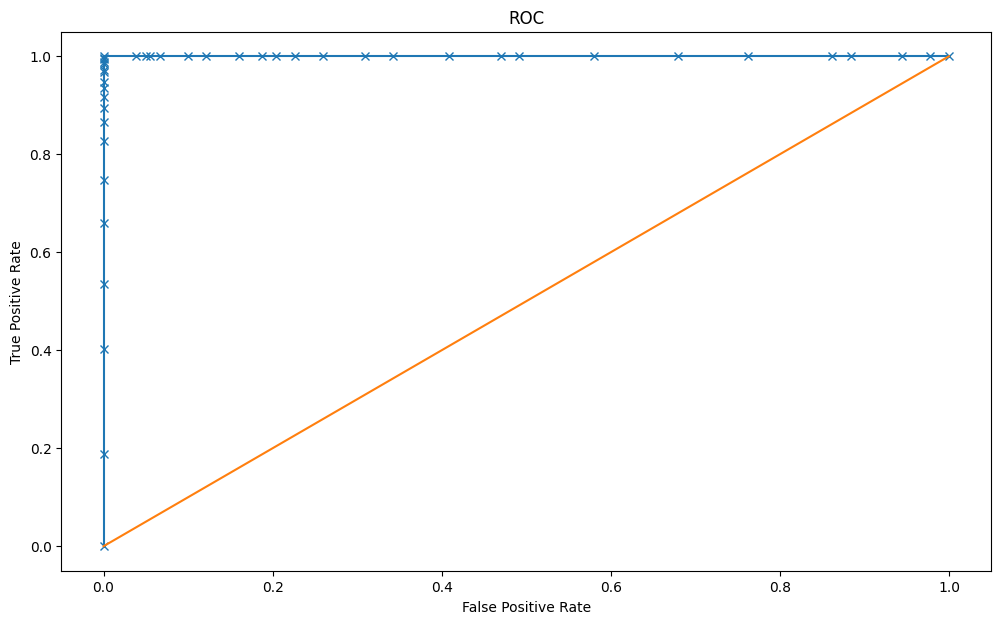

Area under Curve is 1.0


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(Y_train,RF_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(Y_train,RF_model.predict_proba(X_train)[:,1]))

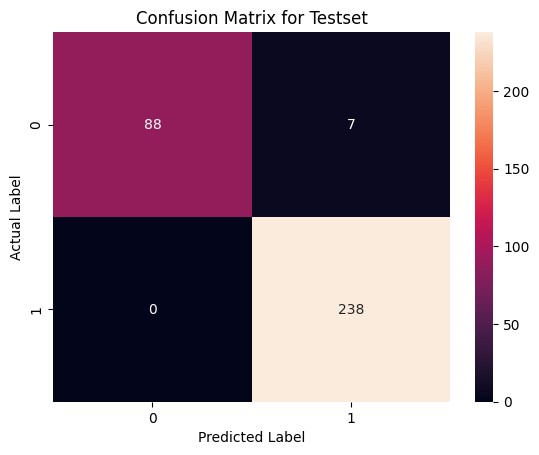

In [ ]:
#Confusion Matrix for Test set
confusion_matrix(Y_test,RF_test_predict)
sns.heatmap(confusion_matrix(Y_test,RF_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [ ]:
print(classification_report(Y_test,RF_test_predict))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        95
           1       0.97      1.00      0.99       238

    accuracy                           0.98       333
   macro avg       0.99      0.96      0.97       333
weighted avg       0.98      0.98      0.98       333



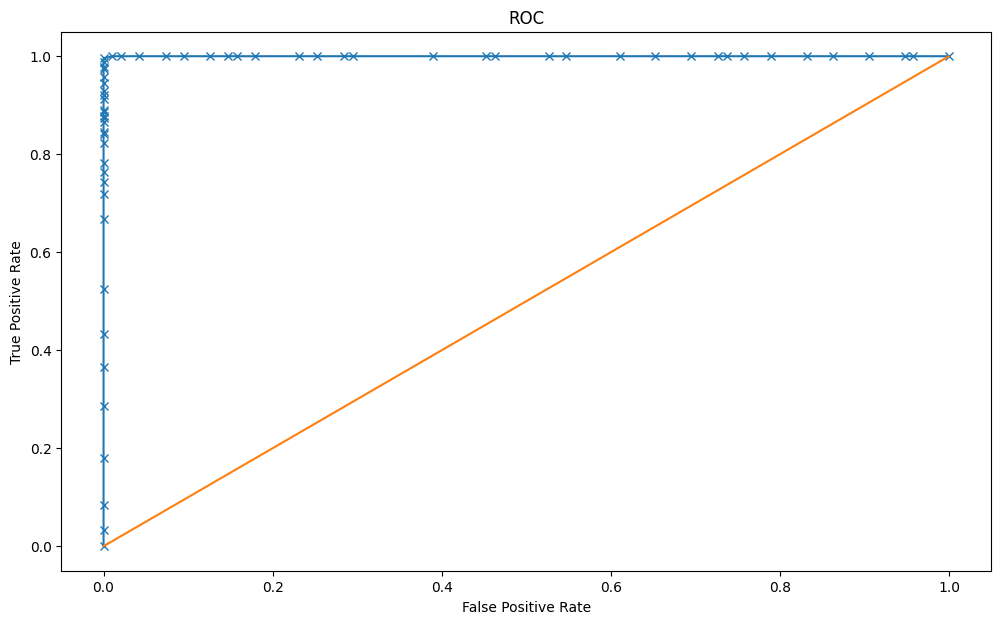

Area under Curve is 0.9999778858911985


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(Y_test,RF_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(Y_test,RF_model.predict_proba(X_test)[:,1]))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model=RF_model.fit(X_train, Y_train)
RF_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train, Y_train)
print(model_score)

1.0


In [ ]:
RF_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, Y_test)
print(model_score)

0.978978978978979


**RF using GridSearch**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200,300 ]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300]}

In [ ]:
param_grid={
    'max_depth':[7,8,9,10],
    'max_features':[3,4,5],
    'min_samples_leaf':[50,100],
    'min_samples_split':[150,300],
    'n_estimators':[100,200,300]
}
rfcl =RandomForestClassifier()
grid_search= GridSearchCV(estimator=rfcl,param_grid=param_grid,cv=3)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [ ]:
best_grid = rf_random.best_estimator_
best_grid

RandomForestClassifier(bootstrap=False, max_depth=40, max_features='auto',
                       n_estimators=1400)

In [ ]:
RF_train_predict = best_grid.predict(X_train)
RF_test_predict = best_grid.predict(X_test)

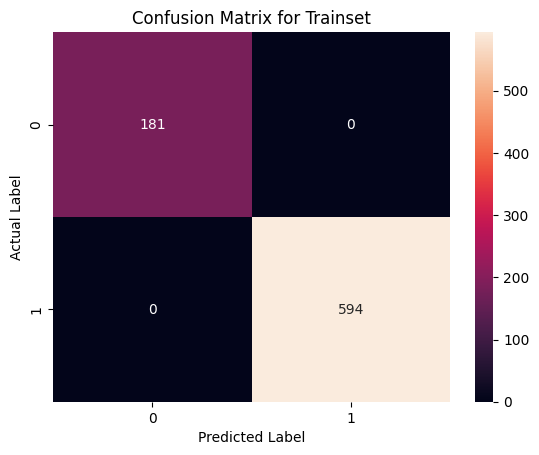

In [ ]:
#Confusion Matrix for Test set
confusion_matrix(Y_train,RF_train_predict)
sns.heatmap(confusion_matrix(Y_train,RF_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [ ]:
print(classification_report(Y_train,RF_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       1.00      1.00      1.00       594

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



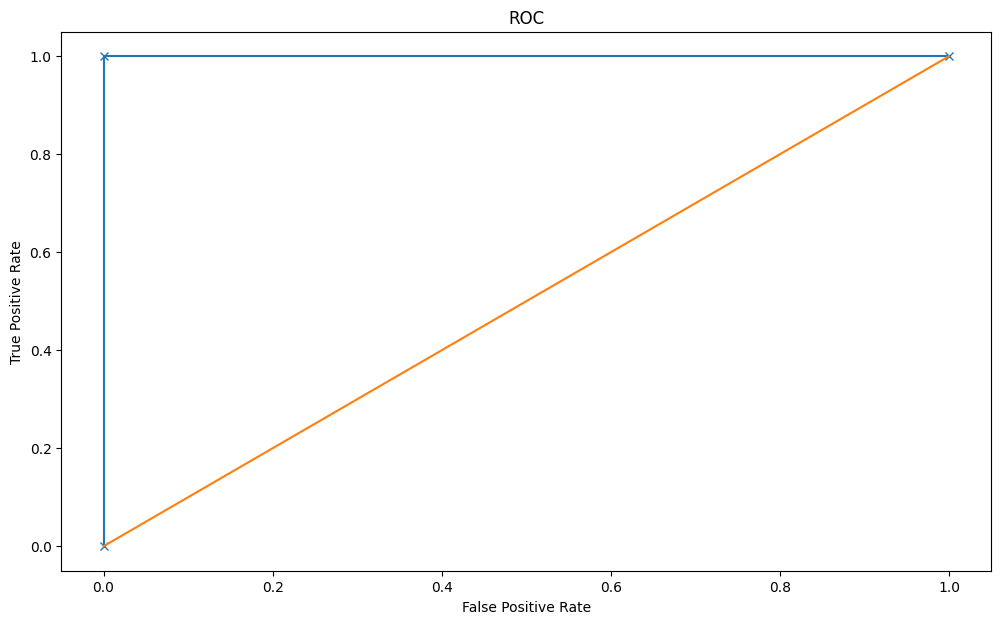

Area under Curve is 1.0


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(Y_train,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(Y_train,best_grid.predict_proba(X_train)[:,1]))

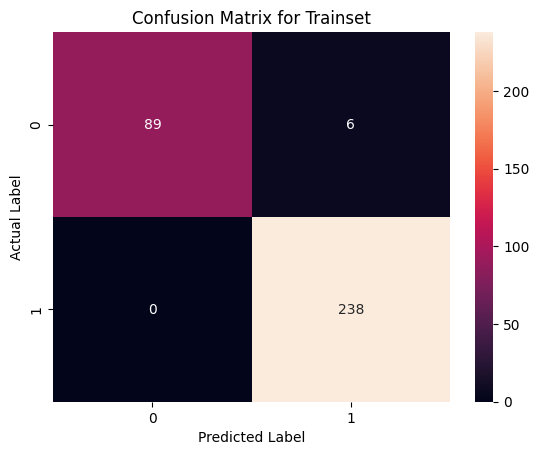

In [ ]:
#Confusion Matrix for Test set
confusion_matrix(Y_test,RF_test_predict)
sns.heatmap(confusion_matrix(Y_test,RF_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [ ]:
print(classification_report(Y_test,RF_test_predict))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        95
           1       0.98      1.00      0.99       238

    accuracy                           0.98       333
   macro avg       0.99      0.97      0.98       333
weighted avg       0.98      0.98      0.98       333



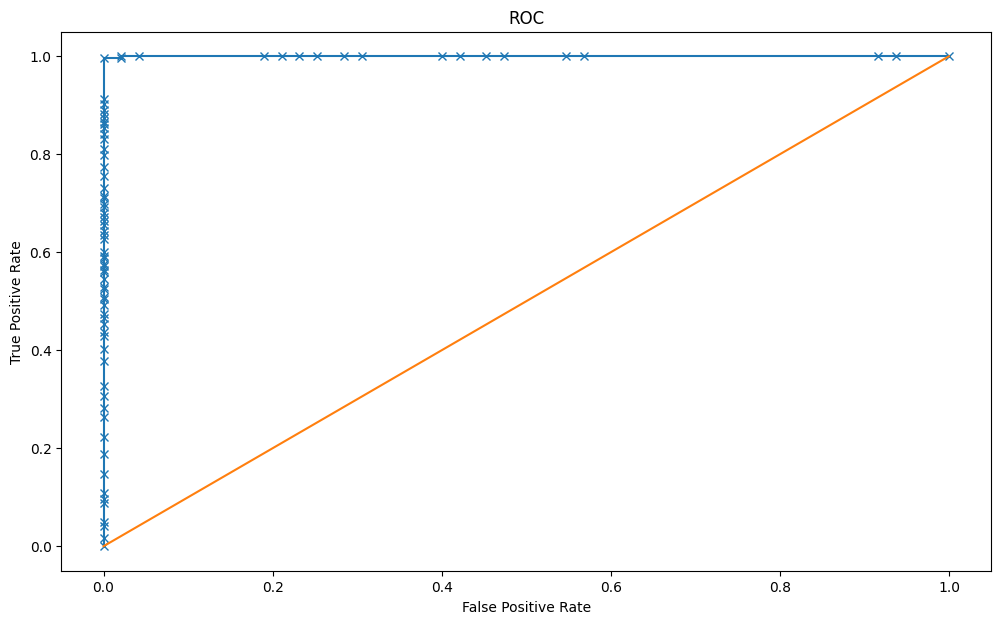

Area under Curve is 0.9999115435647944


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(Y_test,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(Y_test,best_grid.predict_proba(X_test)[:,1]))

Feature: 0, Score: 0.15640
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.12512
Feature: 3, Score: 0.09728
Feature: 4, Score: 0.04044
Feature: 5, Score: 0.04522
Feature: 6, Score: 0.06518
Feature: 7, Score: 0.16271
Feature: 8, Score: 0.04708
Feature: 9, Score: 0.05443
Feature: 10, Score: 0.03509
Feature: 11, Score: 0.01466
Feature: 12, Score: 0.04661
Feature: 13, Score: 0.03835
Feature: 14, Score: 0.07143


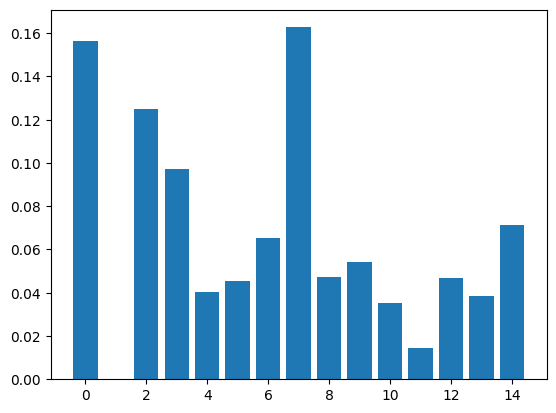

In [ ]:
# get importance
importance = best_grid.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, Y_train)
    # evaluate test accuracy
    scores = KNN.score(X_test, Y_test)
    ac_scores.append(scores)

# accuracy scores for 1,3,5,7....
MCE = [1-x for x in ac_scores]
acc = [x for x in ac_scores]
acc

[1.0,
 0.954954954954955,
 0.8558558558558559,
 0.7867867867867868,
 0.7687687687687688,
 0.7327327327327328,
 0.7297297297297297,
 0.7357357357357357,
 0.7447447447447447,
 0.7507507507507507]

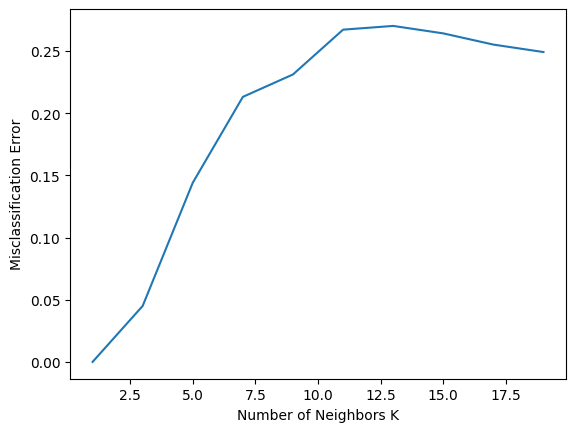

In [ ]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### **The plot shows 3 is most optimum for KNN, hence doing so.**

In [ ]:
#model score k=3
KNN_model=KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train,Y_train)
KNN_train_predict = KNN_model.predict(X_train)

KNN_test_predict = KNN_model.predict(X_test)

In [ ]:
KNN_model.score(X_train,Y_train)

0.9935483870967742

In [ ]:
KNN_model.score(X_test,Y_test)

0.954954954954955

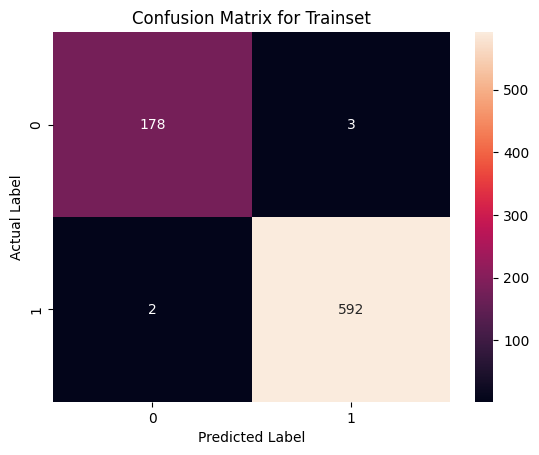

In [ ]:
#Confusion Matrix for Train set
confusion_matrix(Y_train,KNN_train_predict)
sns.heatmap(confusion_matrix(Y_train,KNN_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [ ]:
print(classification_report(Y_train,KNN_train_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       181
           1       0.99      1.00      1.00       594

    accuracy                           0.99       775
   macro avg       0.99      0.99      0.99       775
weighted avg       0.99      0.99      0.99       775



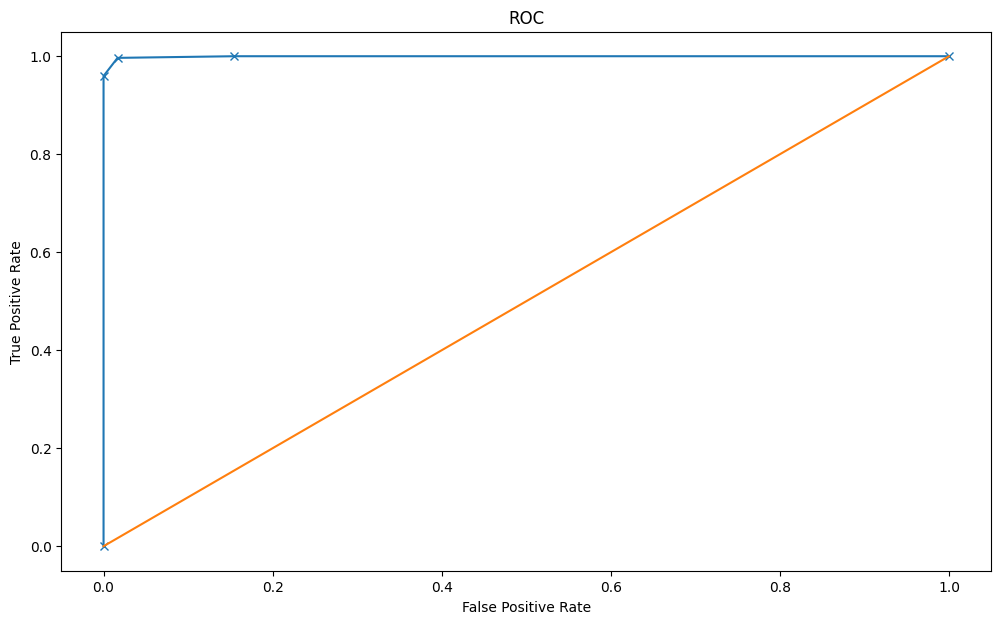

Area under Curve is 0.9994047286864965


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(Y_train,KNN_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(Y_train,KNN_model.predict_proba(X_train)[:,1]))

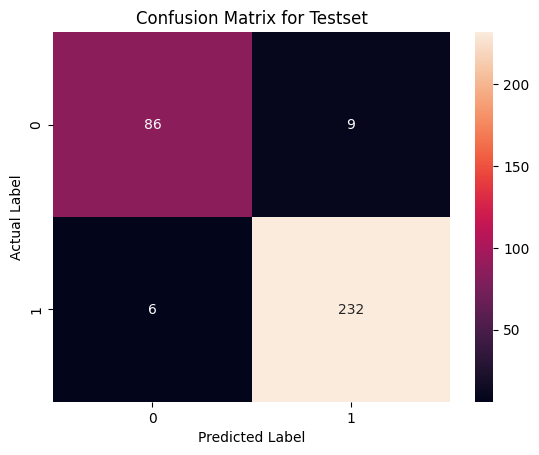

In [ ]:
#Confusion Matrix for Train set
confusion_matrix(Y_test,KNN_test_predict)
sns.heatmap(confusion_matrix(Y_test,KNN_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [ ]:
print(classification_report(Y_test,KNN_test_predict))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        95
           1       0.96      0.97      0.97       238

    accuracy                           0.95       333
   macro avg       0.95      0.94      0.94       333
weighted avg       0.95      0.95      0.95       333



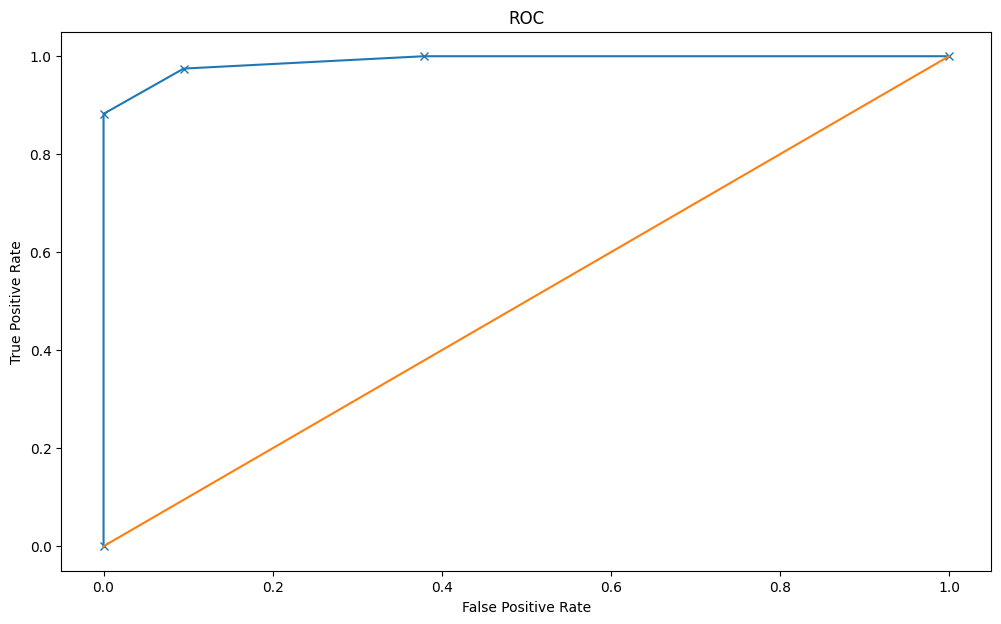

Area under Curve is 0.9896505970809376


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(Y_test,KNN_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(Y_test,KNN_model.predict_proba(X_test)[:,1]))

### **Now SMOTE**

In [ ]:
sm = SMOTE()


X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train.ravel())

In [ ]:
X_train_res.shape

(1188, 15)

### **Logistic Regression**

In [ ]:
smote_log_model = LogisticRegression()
smote_log_model.fit(X_train_res, Y_train_res)

LogisticRegression()

In [ ]:
smote_log_train_predict = smote_log_model.predict(X_train_res)
smote_log_test_predict = smote_log_model.predict(X_test)
## Performance Matrix on train data set with SMOTE
smote_log_train_predict = smote_log_model.predict(X_train_res)
model_score = smote_log_model.score(X_train_res, Y_train_res)
print(model_score)
print(metrics.confusion_matrix(Y_train_res, smote_log_train_predict))
print(metrics.classification_report(Y_train_res ,smote_log_train_predict))

0.6784511784511784
[[433 161]
 [221 373]]
              precision    recall  f1-score   support

           0       0.66      0.73      0.69       594
           1       0.70      0.63      0.66       594

    accuracy                           0.68      1188
   macro avg       0.68      0.68      0.68      1188
weighted avg       0.68      0.68      0.68      1188



In [ ]:
smote_log_test_predict = smote_log_model.predict(X_test)
model_score = smote_log_model.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, smote_log_test_predict))
print(metrics.classification_report(Y_test ,smote_log_test_predict))

0.6576576576576577
[[ 70  25]
 [ 89 149]]
              precision    recall  f1-score   support

           0       0.44      0.74      0.55        95
           1       0.86      0.63      0.72       238

    accuracy                           0.66       333
   macro avg       0.65      0.68      0.64       333
weighted avg       0.74      0.66      0.67       333



### **Linear Discrimant Analysis**

In [ ]:
smote_lda_model = LinearDiscriminantAnalysis()
smote_lda_model.fit(X_train_res, Y_train_res)

LinearDiscriminantAnalysis()

In [ ]:
smote_lda_train_predict = smote_lda_model.predict(X_train_res)
smote_lda_test_predict = smote_lda_model.predict(X_test)

In [ ]:
## Performance Matrix on train data set with SMOTE
smote_lda_train_predict = smote_lda_model.predict(X_train_res)
model_score = smote_log_model.score(X_train_res, Y_train_res)
print(model_score)
print(metrics.confusion_matrix(Y_train_res, smote_lda_train_predict))
print(metrics.classification_report(Y_train_res ,smote_lda_train_predict))

0.6784511784511784
[[457 137]
 [125 469]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       594
           1       0.77      0.79      0.78       594

    accuracy                           0.78      1188
   macro avg       0.78      0.78      0.78      1188
weighted avg       0.78      0.78      0.78      1188



In [ ]:
smote_log_test_predict = smote_lda_model.predict(X_test)
model_score = smote_lda_model.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, smote_lda_test_predict))
print(metrics.classification_report(Y_test ,smote_lda_test_predict))

0.7537537537537538
[[ 72  23]
 [ 59 179]]
              precision    recall  f1-score   support

           0       0.55      0.76      0.64        95
           1       0.89      0.75      0.81       238

    accuracy                           0.75       333
   macro avg       0.72      0.75      0.73       333
weighted avg       0.79      0.75      0.76       333



## **KNN**

In [ ]:
Smote_KNN = KNeighborsClassifier(n_neighbors=3)
Smote_KNN.fit(X_train_res, Y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
Smote_KNN_train_predict = Smote_KNN.predict(X_train_res)
Smote_KNN_test_predict = Smote_KNN.predict(X_test)
## Performance Matrix on train data set with SMOTE
Smote_KNN_train_predict = Smote_KNN.predict(X_train_res)
model_score = Smote_KNN.score(X_train_res, Y_train_res)
print(model_score)
print(metrics.confusion_matrix(Y_train_res, Smote_KNN_train_predict))
print(metrics.classification_report(Y_train_res ,Smote_KNN_train_predict))

0.9873737373737373
[[582  12]
 [  3 591]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       594
           1       0.98      0.99      0.99       594

    accuracy                           0.99      1188
   macro avg       0.99      0.99      0.99      1188
weighted avg       0.99      0.99      0.99      1188



In [ ]:
smote_log_test_predict = Smote_KNN.predict(X_test)
model_score = Smote_KNN.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, smote_log_test_predict))
print(metrics.classification_report(Y_test ,smote_log_test_predict))

0.948948948948949
[[ 89   6]
 [ 11 227]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        95
           1       0.97      0.95      0.96       238

    accuracy                           0.95       333
   macro avg       0.93      0.95      0.94       333
weighted avg       0.95      0.95      0.95       333



## **Random Forest**

In [ ]:
Smote_RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
Smote_RF_model=Smote_RF_model.fit(X_train_res, Y_train_res)

In [ ]:
Smote_RF_train_predict = Smote_RF_model.predict(X_train_res)
Smote_RF_test_predict = Smote_RF_model.predict(X_test)
## Performance Matrix on train data set with SMOTE
Smote_RF_train_predict = Smote_RF_model.predict(X_train_res)
model_score = Smote_RF_model.score(X_train_res, Y_train_res)
print(model_score)
print(metrics.confusion_matrix(Y_train_res, Smote_RF_train_predict))
print(metrics.classification_report(Y_train_res ,Smote_RF_train_predict))

1.0
[[594   0]
 [  0 594]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       594

    accuracy                           1.00      1188
   macro avg       1.00      1.00      1.00      1188
weighted avg       1.00      1.00      1.00      1188



In [ ]:
Smote_RF_test_predict = Smote_RF_model.predict(X_test)
model_score = Smote_RF_model.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, Smote_RF_test_predict))
print(metrics.classification_report(Y_test ,Smote_RF_test_predict))

0.9819819819819819
[[ 89   6]
 [  0 238]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        95
           1       0.98      1.00      0.99       238

    accuracy                           0.98       333
   macro avg       0.99      0.97      0.98       333
weighted avg       0.98      0.98      0.98       333

